In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sp_price_action = pd.read_csv('./data/SP_price_action.csv')
sp_price_action = sp_price_action[['Date', 'Adj Close', 'Volume']]
sp_price_action.columns = ['date', 'price', 'volume']
sp_price_action['date'] = pd.to_datetime(sp_price_action['date'])
sp_price_action = sp_price_action[~sp_price_action['price'].isna()]
sp_price_action = sp_price_action[sp_price_action['volume'] > 0]
sp_price_action.head()

,date,price,volume
5496,1950-01-03,16.66,1260000.0
5497,1950-01-04,16.85,1890000.0
5498,1950-01-05,16.93,2550000.0
5499,1950-01-06,16.98,2010000.0
5500,1950-01-09,17.08,2520000.0


In [3]:
#Columns to add
sp_price_action.set_index('date', inplace=True)
sp_price_action['price_1d_diff'] = sp_price_action['price'].diff()
sp_price_action['price_1m_diff'] = sp_price_action['price'] - sp_price_action['price'].shift(21) 
sp_price_action['volume_1d_diff'] = sp_price_action['volume'].diff()
sp_price_action['volume_1m_diff'] = sp_price_action['volume'] - sp_price_action['volume'].shift(21) 
sp_price_action['price_pct_change'] = sp_price_action['price'].pct_change() * 100
sp_price_action['rolling_mean_price_7d'] = sp_price_action['price'].rolling(window=7).mean()
sp_price_action['rolling_mean_price_60d'] = sp_price_action['price'].rolling(window=60).mean()
sp_price_action['rolling_std_price_7d'] = sp_price_action['price'].rolling(window=7).std()
sp_price_action['rolling_mean_volume_7d'] = sp_price_action['volume'].rolling(window=7).mean()
sp_price_action['rolling_std_volume_7d'] = sp_price_action['volume'].rolling(window=7).std()
sp_price_action['momentum_14d'] = sp_price_action['price'] - sp_price_action['price'].shift(14)
sp_price_action['ema_20d'] = sp_price_action['price'].ewm(span=20, adjust=False).mean()
sp_price_action['price_yoy_diff'] = sp_price_action['price'] - sp_price_action['price'].shift(365)
sp_price_action['volume_yoy_diff'] = sp_price_action['volume'] - sp_price_action['volume'].shift(365)
sp_price_action['price_yoy_pct_change'] = sp_price_action['price'].pct_change(periods=365) * 100
sp_price_action['volume_yoy_pct_change'] = sp_price_action['volume'].pct_change(periods=365) * 100

In [4]:
df = sp_price_action.copy()

In [5]:
df.tail()

,price,volume,price_1d_diff,price_1m_diff,volume_1d_diff,volume_1m_diff,price_pct_change,rolling_mean_price_7d,rolling_mean_price_60d,rolling_std_price_7d,rolling_mean_volume_7d,rolling_std_volume_7d,momentum_14d,ema_20d,price_yoy_diff,volume_yoy_diff,price_yoy_pct_change,volume_yoy_pct_change
date,,,,,,,,,,,,,,,,,,
2024-06-05,5354.029785,3.591460e+09,62.689941,173.289551,-116440000.0,-91790000.0,1.184765,5287.821359,5185.659847,36.580868,3.986640e+09,6.599526e+08,45.879883,5262.797892,1532.409668,-393910000.0,40.098430,-9.883900
2024-06-06,5352.959961,3.609990e+09,-1.069824,165.259766,18530000.0,-377900000.0,-0.019982,5294.524205,5188.621346,44.018139,3.966419e+09,6.704421e+08,55.859863,5271.384756,1474.520020,-165210000.0,38.018380,-4.376192
2024-06-07,5346.990234,3.692760e+09,-5.969727,159.320312,82770000.0,-149340000.0,-0.111522,5305.958496,5191.649349,46.012202,3.986420e+09,6.580175e+08,43.720214,5278.585277,1524.600341,-264190000.0,39.886050,-6.676607
2024-06-10,5360.790039,3.622280e+09,13.799805,146.709961,-70480000.0,-105090000.0,0.258085,5323.859933,5195.154517,37.635939,3.958353e+09,6.704343e+08,52.660156,5286.414302,1515.969971,803000000.0,39.428892,28.482449
2024-06-12,5421.029785,2.712485e+09,60.239746,198.349609,-909795303.0,-905415303.0,1.123710,5344.362793,5200.220182,46.277883,3.569114e+09,4.085868e+08,99.619629,5299.234825,1591.779785,-317815303.0,41.568970,-10.487915


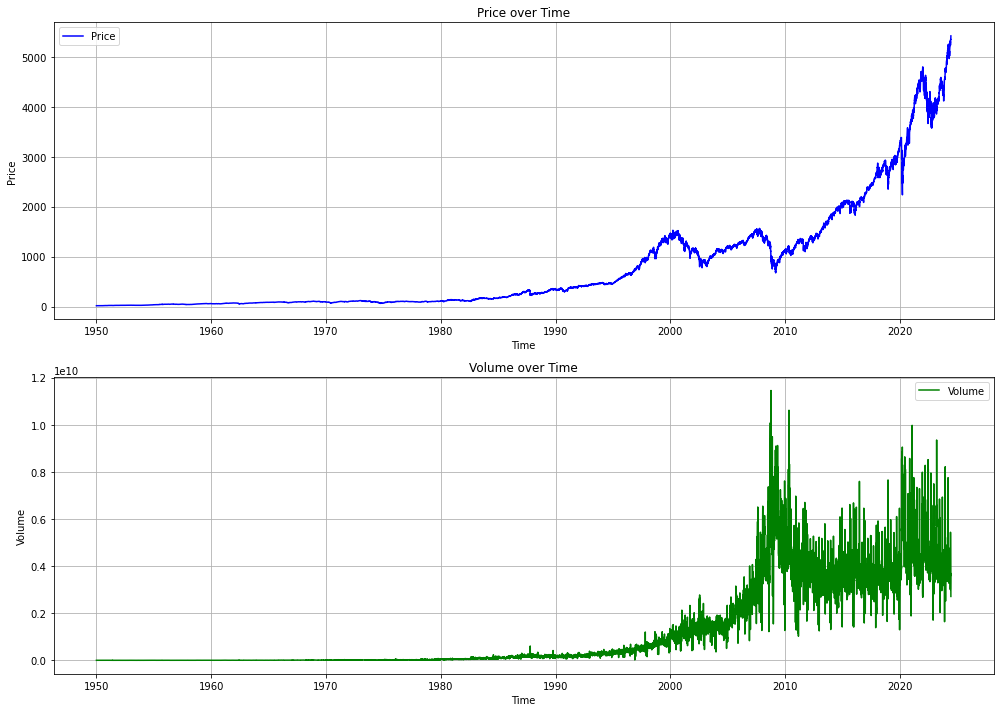

In [6]:
# Line Plot of Price and Volume over Time
plt.figure(figsize=(14, 10))

# Plot Price over Time
plt.subplot(2, 1, 1)
plt.plot(df.index, df['price'], label='Price', color='blue')
plt.title('Price over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plot Volume over Time
plt.subplot(2, 1, 2)
plt.plot(df.index, df['volume'], label='Volume', color='green')
plt.title('Volume over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

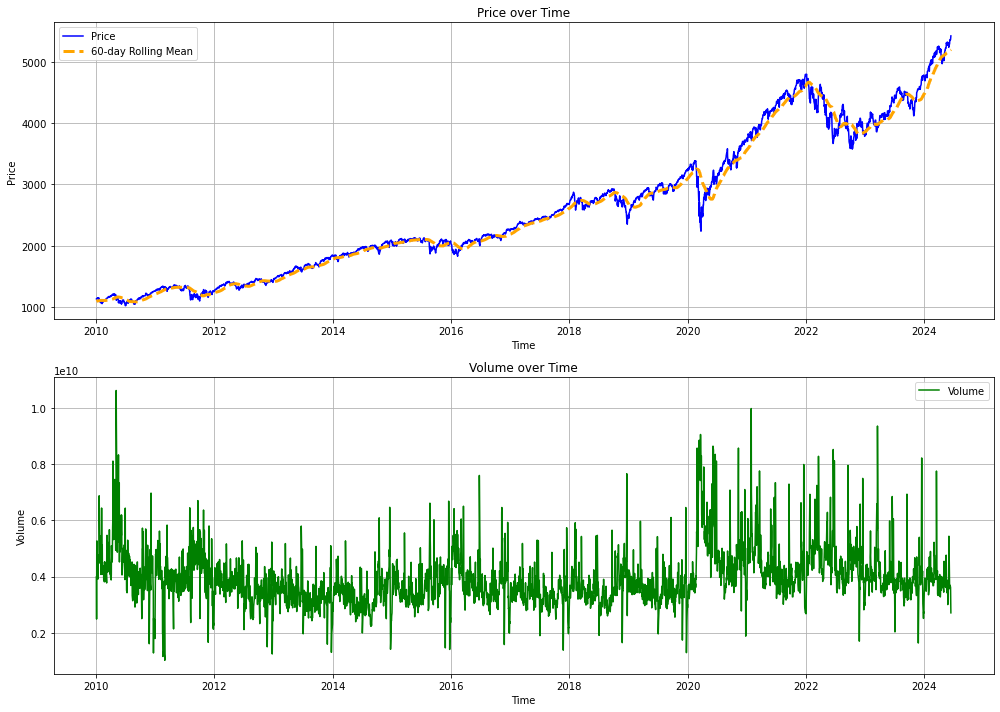

In [7]:
df_after_2010 = df[df.index >= '2010-01-01'].copy()

plt.figure(figsize=(14, 10))

# Plot Price over Time
plt.subplot(2, 1, 1)
plt.plot(df_after_2010.index, df_after_2010['price'], label='Price', color='blue')
plt.plot(df_after_2010.index, df_after_2010['rolling_mean_price_60d'], label='60-day Rolling Mean', color='orange', linestyle='--', linewidth=3)
plt.title('Price over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plot Volume over Time
plt.subplot(2, 1, 2)
plt.plot(df_after_2010.index, df_after_2010['volume'], label='Volume', color='green')
plt.title('Volume over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The price and the volume of the S&P 500 index have significantly increased over time. However, the S&P 500 index price has continuously increased over time while the trading volume has remained relatively constant since 2010. This could indicate ***strong market confidence and a shift towards long-term and passive investing strategies.***

In [8]:
econ_num = pd.read_csv('./processed_data/year_related_economic_data_numeric_only_for_modeling.csv')
econ_num.head()

,year,price_yoy_pct_change,volume_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change,1yr_fed_funds_pct_change,1yr_cpi_pct_change,action
0,1951,29.029773,-15.020485,-35.340175,NaN,10.564877,NaN,NaN,buy
1,1952,19.887514,-24.103316,-7.507572,NaN,5.165332,NaN,NaN,sell
2,1953,4.972609,5.171929,-2.239049,-2.474865,6.189877,NaN,NaN,buy
3,1954,18.549472,76.504025,97.397452,-0.118953,-1.781925,NaN,NaN,buy
4,1955,55.606807,74.416946,-21.375729,16.990869,6.170199,NaN,NaN,buy


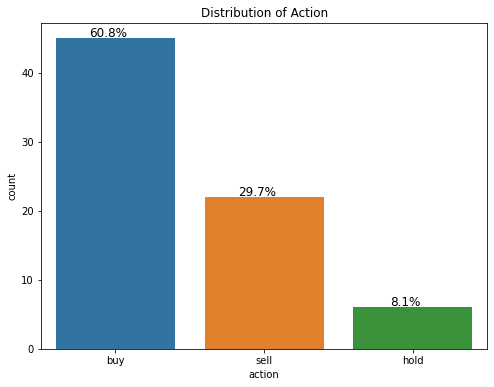

In [9]:
# Count Plot with Percentage Text
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='action', data=econ_num)
plt.title('Distribution of Action')

# Adding percentage annotations
total = len(econ_num)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

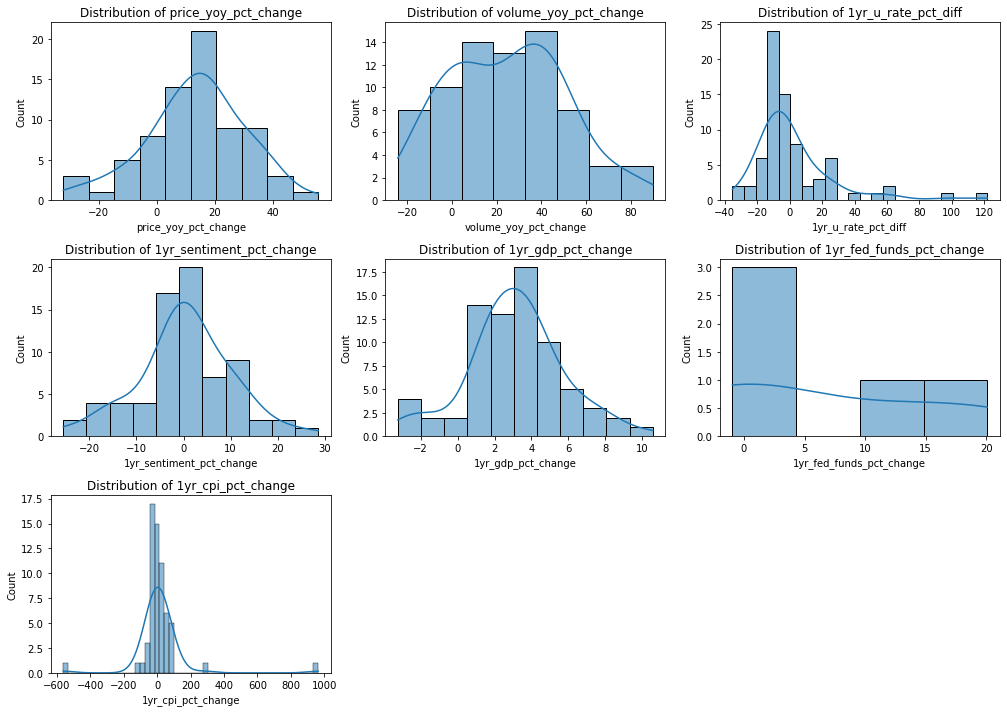

In [10]:
# Distribution Plots
plt.figure(figsize=(14, 10))
for i, column in enumerate(econ_num.columns[1:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(econ_num[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

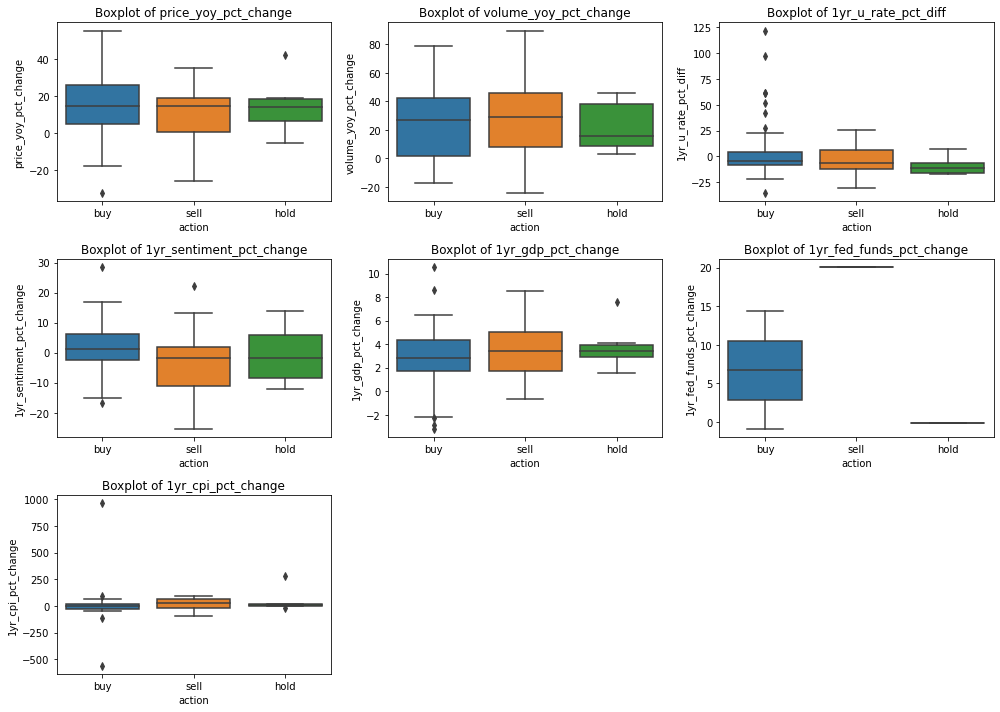

In [11]:
# Box Plots
plt.figure(figsize=(14, 10))
for i, column in enumerate(econ_num.columns[1:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='action', y=column, data=econ_num)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

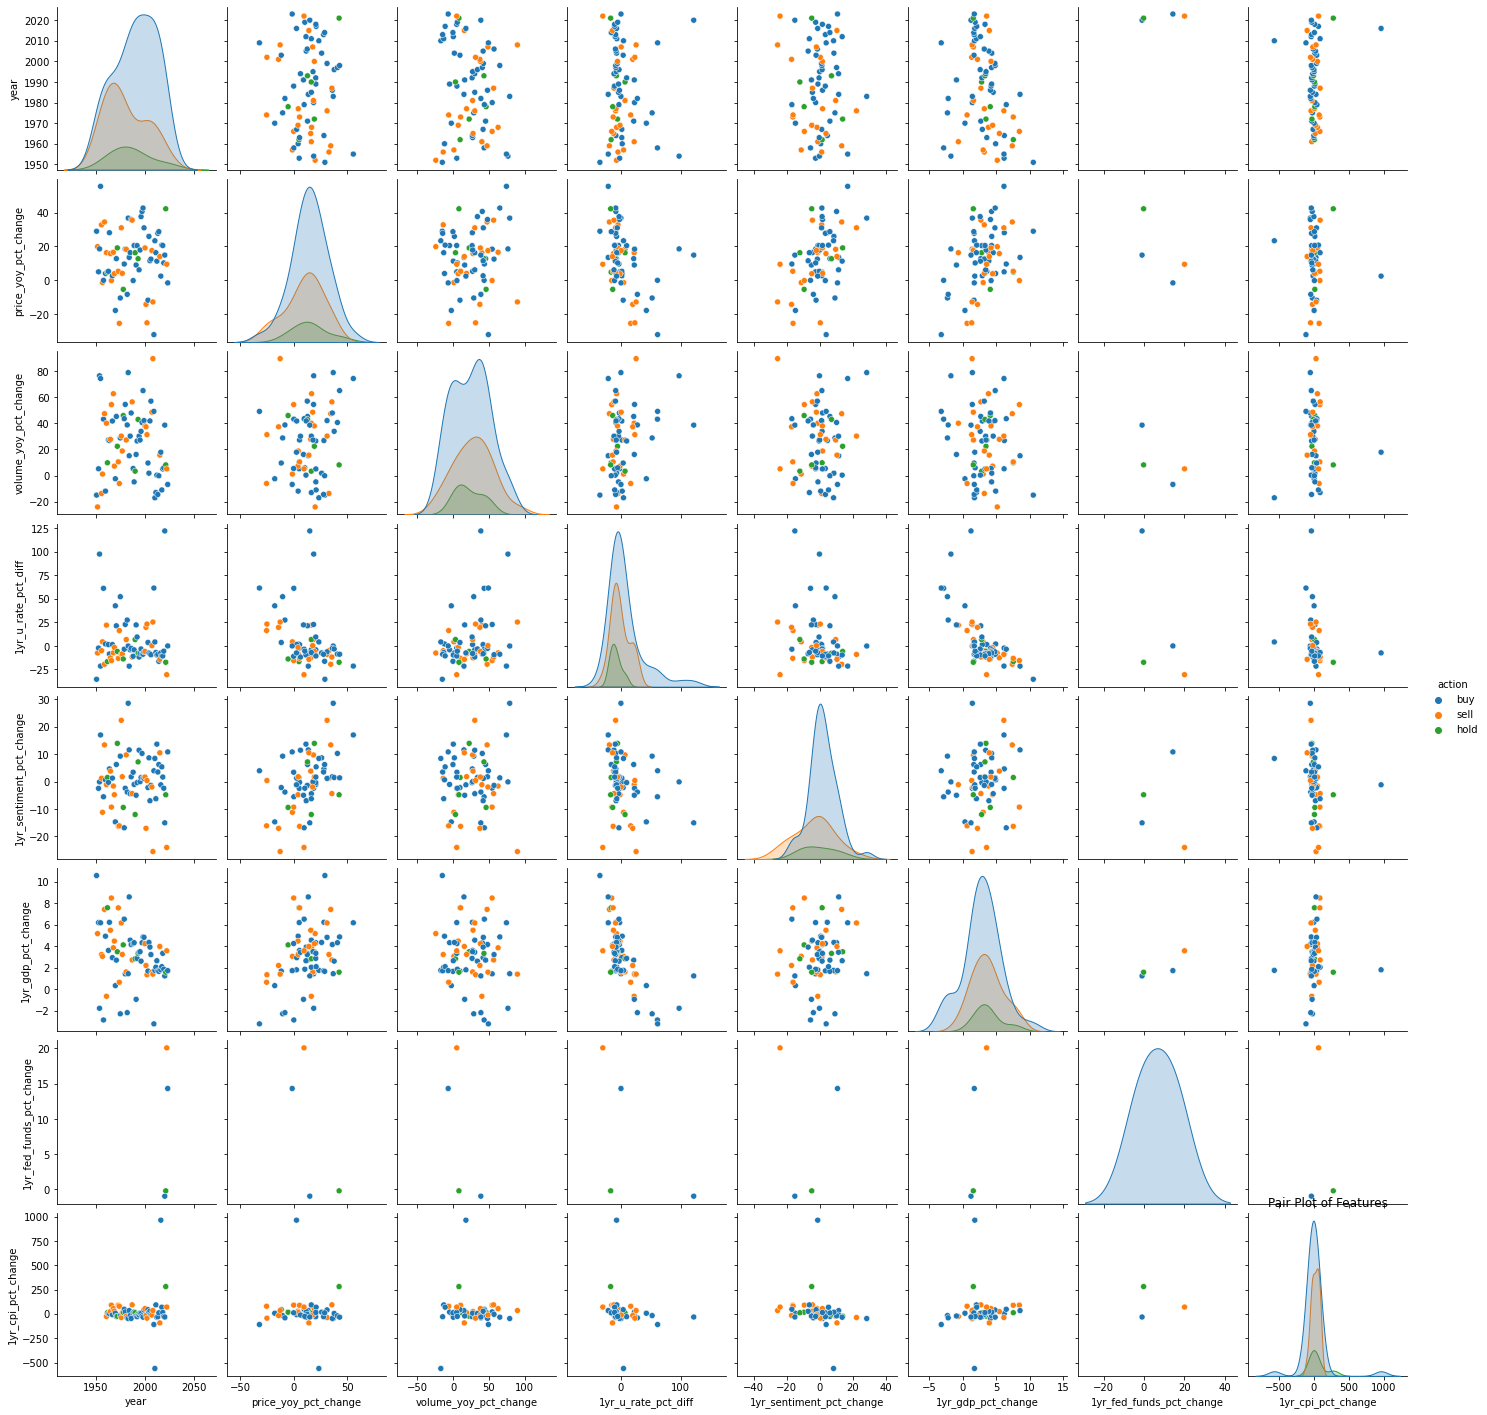

In [12]:
# Pair Plot
sns.pairplot(econ_num, hue='action')
plt.title('Pair Plot of Features')
plt.show()

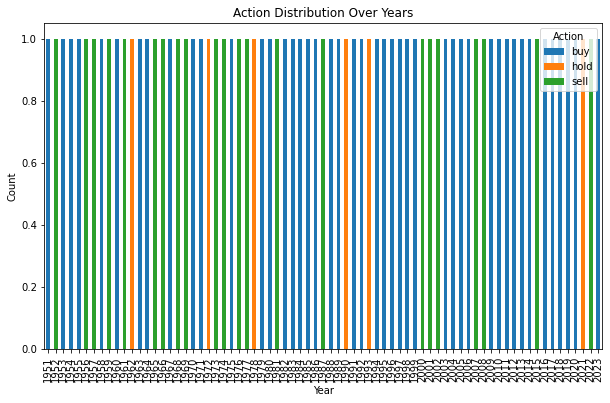

In [13]:
crosstab = pd.crosstab(econ_num['year'], econ_num['action'])

# Plotting the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Action Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Action')
plt.show()

In [15]:
u_rate = pd.read_csv('./processed_data/u_rate_processed.csv')
u_rate.head()

,date,base_u_rate,1m_u_rate_pct_change,1yr_u_rate_pct_diff
0,1948-01-01,3.4,NaN,NaN
1,1948-02-01,3.8,11.764706,NaN
2,1948-03-01,4.0,5.263158,NaN
3,1948-04-01,3.9,-2.500000,NaN
4,1948-05-01,3.5,-10.256410,NaN


In [16]:
cci = pd.read_csv('./processed_data/sentiment_processed.csv')
cci.head()

,date,base_sentiment,1yr_sentiment_pct_change
0,1952-01-01,86.200000,NaN
1,1953-01-01,84.066667,-2.474865
2,1954-01-01,83.966667,-0.118953
3,1955-01-01,98.233333,16.990869
4,1956-01-01,99.433333,1.221581


In [17]:
u_rate['date'] = pd.to_datetime(u_rate['date'])
cci['date'] = pd.to_datetime(cci['date'])

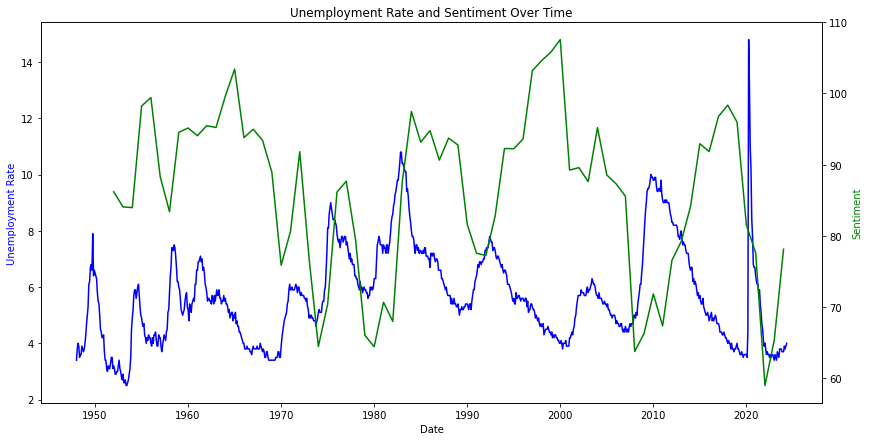

In [28]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the unemployment rate
sns.lineplot(data=u_rate, x='date', y='base_u_rate', ax=ax1, color='blue')

# Create a second y-axis for the sentiment
ax2 = ax1.twinx()
sns.lineplot(data=cci, x='date', y='base_sentiment', ax=ax2, color='green')

# Add a title and labels
plt.title('Unemployment Rate and Sentiment Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment Rate', color='blue')
ax2.set_ylabel('Sentiment', color='green')

# Display the legend
# fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Show the plot
plt.show()